In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_circle():
    y=0.975
    r=np.random.uniform(0.025,0.1)
    x=np.random.uniform(0,1)
    while ((x+r>1) | (x-r<0)):
        x=np.random.uniform(0,1)
        
    return(x,y,r)

In [14]:
def check_vicinity(x,y,r,xList,yList,zList):
    
    if((y-r)<=0):
        return (x,y,r,[],[],[],0)
    
    else:
        #if circle does not touch ground
    # defining the box of influence
        x_vi_max=x+r+0.1          #0.1 is the highest radius of disks 
        x_vi_min=x-r-0.1
        y_vi_max=y+r+0.1
        y_vi_min=y-r-0.1
    
        xNear=[]
        yNear=[]
        rNear=[]
        
    # find all centers within vicinity (box of influence)
        for m,n,o in zip(xList,yList,rList):
            if (m<=x_vi_max) & (m>=x_vi_min) & (n<=y_vi_max) & (n>=y_vi_min):
                xNear.append(m)
                yNear.append(n)
                rNear.append(o)
        
        #checks to see if there is anyone in the box
        if (len(rNear)==0):
            check_vicinity(x,y-0.005,r,xList,yList,rList)
            
        return(x,y,r,xNear,yNear,rNear,1) 

In [23]:
     # defining a box around the circle where it will check for probable touches
def check_vicinity(x,y,r,xList,yList,zList):
    
    if ((y-r)<=0):  #checks if circle touches ground
        return(x,y,r,[],[],[],0) #returns k=0 when circle touches ground
    else:
        
    #if circle does not touch ground
    # defining the box of influence
        x_vi_max=x+r+0.1          #0.1 is the highest radius of disks 
        x_vi_min=x-r-0.1
        y_vi_max=y+r+0.1
        y_vi_min=y-r-0.1
    
        xNear=[]
        yNear=[]
        rNear=[]
        
    # find all centers within vicinity (box of influence)
        for m,n,o in zip(xList,yList,rList):
            if (m<=x_vi_max) & (m>=x_vi_min) & (n<=y_vi_max) & (n>=y_vi_min):
                xNear.append(m)
                yNear.append(n)
                rNear.append(o)
        
        #checks to see if there is anyone in the box
        if (len(rNear)==0):
            check_vicinity(x,y-0.005,r,xList,yList,rList)
            
        return(x,y,r,xNear,yNear,rNear,1)  #returns nearby circle details

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [16]:
#checks for touching circles
def check_touch(x,y,r,XNear,YNear,RNear):
    touching_xlist=[]
    touching_ylist=[]
    touching_rlist=[]
    t=0
    
    for m,n,o in zip(XNear,YNear,RNear):
        dist=np.sqrt((m-x)**2+(n-y)**2)
        if(dist<=(o+r)):
            t+=1
            touching_xlist.append(m)
            touching_ylist.append(n)
            touching_rlist.append(r)
    
    return (x,y,r,t,touching_xlist,touching_ylist,touching_rlist)

In [17]:
#checks where the touching circles are located, how many are there 
def touch_condition(x,y,r,touching_xlist,touching_ylist,touching_rlist):
    #print(len(touching_xlist), x,y)
    left_t=right_t=0
    
    for m,n,o in zip(touching_xlist,touching_ylist,touching_rlist):
        if (m>x):
            right_t+=1
        else:
            left_t+=1
    
    if (right_t>0 & left_t>0):
        return('stay')
           
    elif (right_t>0):
        return('right')
    elif (left_t>0):
        return('left')

In [20]:
#if touching a circle, it moves perpendicular to the angle of contact
def rolldown(x,y,r,touching_xlist,touching_ylist,touching_rlist,where):
    
    rolly_y = min(touching_ylist)
    index = touching_ylist.index(rolly_y)
    rolly_x=touching_xlist[index-1]
    rolly_r=touching_rlist[index-1]
    
    contact_angle= math.atan((y-rolly_y)/(x-rolly_x))

    angle=(math.atan((y-rolly_y)/(x-rolly_x)))+math.radians(90)
    #print (angle)
    new_y=y-(0.005*math.sin(angle))
    if (where=='right'):
        new_x=x-(0.005*math.cos(angle))
    else:
        new_x=x+(0.005*math.cos(angle))
    
    return(new_x,new_y,r)
    

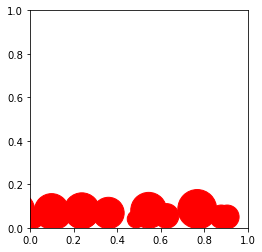

In [24]:

xList=[]
yList=[]
rList=[]
Area=0

while (Area<=(0.30-np.pi*0.1**2)):
    circle_can_move=True
    x,y,r=generate_circle()
    while (circle_can_move==True):
        a,b,c,xl,yl,rl,k=check_vicinity(x,y,r,xList,yList,rList)
        if (k==0):
            xList.append(x)
            yList.append(y)
            rList.append(r)
            Area+=np.pi*r**2
            circle_can_move=False

        else:
            #i,j,k,xt,yt,rt,wheret=check_touch(a,b,c,xl,yl,rl)
            x,y,r,touch,x_tList,y_tList,r_tList=check_touch(a,b,c,xl,yl,rl)
            if (touch==0):
                y=y-0.005
                #check_vicinity (x,y,r,xList,yList,rList) # falling
            else:
                where = touch_condition(x,y,r,x_tList,y_tList,r_tList)
                if (where=='stay'):
                    xList.append(x)
                    yList.append(y)
                    rList.append(r)
                    Area+=np.pi*r**2
                    circle_can_move=False
                else:
                    x,y,r= rolldown(x,y,r,x_tList,y_tList,r_tList,where)

#input('asdfasd')                   
#print (Area)
fig, ax = plt.subplots()
#ax.axis('equal')
ax.set_aspect(1)
ax.set(xlim=(0, 1), ylim = (0, 1))
for i in range(len(xList)):
    circle1 = plt.Circle((xList[i], yList[i]), rList[i], color = 'r')
    ax.add_artist(circle1)
plt.show()